# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



In [35]:
import pandas as pd

# URL of the dataset
url = "https://s3.amazonaws.com/talent-assets.datacamp.com/food_claims_2212.csv"

# Read the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.sample(frac=0.25)


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
440,441,141,R$ 3360.13,2464.32,RECIFE,2,False,vegetable
533,534,187,R$ 38182.27,32117.16,RECIFE,13,True,meat
834,835,183,R$ 22794.45,22245.64,FORTALEZA,9,True,meat
1202,1203,163,R$ 15045.34,NaN,SAO LUIS,5,False,meat
1108,1109,215,R$ 35305.81,31237.43,RECIFE,12,False,meat
...,...,...,...,...,...,...,...,...
970,971,172,R$ 11195.53,7822.06,RECIFE,5,True,vegetable
1784,1785,176,R$ 22538.57,20407.89,NATAL,6,True,unknown
1943,1944,170,R$ 13638.58,12338.56,NATAL,4,True,unknown
862,863,178,R$ 22846.5,22446.33,NATAL,9,False,meat


In [36]:
df.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


In [37]:
df.columns

Index(['claim_id', 'time_to_close', 'claim_amount', 'amount_paid', 'location',
       'individuals_on_claim', 'linked_cases', 'cause'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [39]:
df['claim_amount'].head()

0    R$ 74474.55
1    R$ 52137.83
2     R$ 24447.2
3    R$ 29006.28
4     R$ 19520.6
Name: claim_amount, dtype: object

In [40]:
df['cause'].unique()

array(['unknown', 'meat', 'vegetable', ' Meat', 'VEGETABLES'],
      dtype=object)

In [41]:
df['individuals_on_claim'].unique()

array([15, 12, 10, 11,  8,  9,  6,  7, 13,  4,  2,  3, 14,  5,  1])

In [42]:
df[df.duplicated()]

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause


In [43]:
df['linked_cases'].unique()

array([False, True, nan], dtype=object)

## Task 1



Here are the answers based on the provided column information:

1. `claim_id`:
   a. Values match the description (Nominal, Unique identifier).
   b. Number of missing values: 0 (Non-null count is 2000).
   c. No action required.

2. `time_to_close`:
   a. Values match the description (Discrete, Positive values).
   b. Number of missing values: 0 (Non-null count is 2000).
   c. No action required.

3. `claim_amount`:
   a. Values do not match the description (Continuous, rounded to 2 decimal places).
   b. Number of missing values: 0 (Non-null count is 2000).
   c. To make values match the description, I converted the column to a numeric type (e.g., float) and round the values to 2 decimal places and removed non mumeric characters

4. `amount_paid`:
   a. Values match the description (Continuous, rounded to 2 decimal places).
   b. Number of missing values: 36 (Non-null count is 1964).
   c. No action required for values that match the description. For missing values, I decided to fill them using the median or another appropriate strategy.

5. `location`:
   a. Values match the description (Nominal, Location categories).
   b. Number of missing values: 0 (Non-null count is 2000).
   c. No action required.

6. `individuals_on_claim`:
   a. Values match the description (Discrete, Minimum 1 person).
   b. Number of missing values: 0 (Non-null count is 2000).
   c. No action required.

7. `linked_cases`:
   a. Values do not match the description (Nominal, TRUE/FALSE values).
   b. Number of missing values: 26 (Non-null count is 1974).
   c. To make values match the description, I  replaced missing values with `FALSE` and convert the column to boolean type.

8. `cause`:
   a. Values match the description (Nominal, Cause categories).
   b. Number of missing values: 0 (Non-null count is 2000).
   c. The categories were changed to lower case 

Please note that for columns where the values do not match the description, appropriate data type conversions and data cleaning may be necessary to align with the given criteria.

In [44]:

# Remove "R$" and spaces, then convert to numeric type
df['claim_amount'] = df['claim_amount'].str.replace('R\$', '').str.replace(' ', '').str.replace('.', '').str.replace(',', '.').astype(float)

# Fill missing values in 'amount_paid' with the median
median_amount_paid = df['amount_paid'].median()
df['amount_paid'].fillna(median_amount_paid, inplace=True)

# Convert 'linked_cases' to boolean type and fill missing values with False
df['linked_cases'] = df['linked_cases'].fillna('FALSE')
df['linked_cases'] = df['linked_cases'].astype('bool')

# Print the modified DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   bool   
 7   cause                 2000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 111.5+ KB


In [45]:
# Correct the values in the 'cause' column
df['cause'] = df['cause'].str.lower().str.strip().replace({
    'meat': 'meat',
    'vegetable': 'vegetable',
    ' meat': 'meat',
    'vegetables': 'vegetable'
})

In [46]:
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,7447455.0,51231.37,RECIFE,15,False,unknown
1,2,195,5213783.0,42111.30,FORTALEZA,12,True,unknown
2,3,183,244472.0,23986.30,SAO LUIS,10,True,meat
3,4,186,2900628.0,27942.72,FORTALEZA,11,False,meat
4,5,138,195206.0,16251.06,RECIFE,11,False,vegetable


In [47]:
df['cause'].unique()

array(['unknown', 'meat', 'vegetable'], dtype=object)

In [58]:
df['individuals_on_claim'].unique()

array([15, 12, 10, 11,  8,  9,  6,  7, 13,  4,  2,  3, 14,  5,  1])

## Task 2

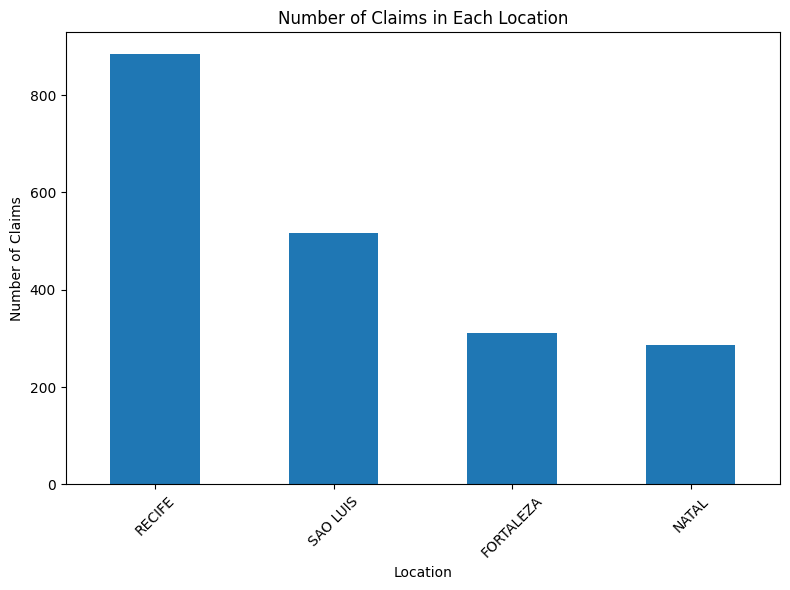

In [48]:
import matplotlib.pyplot as plt

# Create a bar plot of the number of claims in each location
plt.figure(figsize=(8, 6))
df['location'].value_counts().plot(kind='bar')
plt.title('Number of Claims in Each Location')
plt.xlabel('Location')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()








- RECIFE has the most observations
- The observations from the location distribution indicates that its imbalance across categories of the variable location

## Task 3

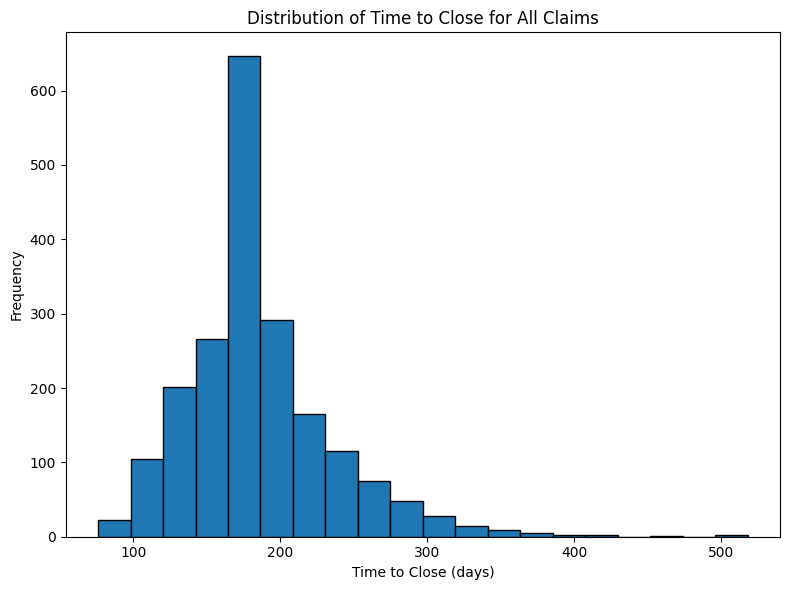

In [49]:
# Create a histogram of time to close
plt.figure(figsize=(8, 6))
plt.hist(df['time_to_close'], bins=20, edgecolor='black')
plt.title('Distribution of Time to Close for All Claims')
plt.xlabel('Time to Close (days)')
plt.ylabel('Frequency')
plt.tight_layout()

# Show the plot
plt.show()

 The distribution of time to close for all claims is skewed to the right , i.e it is positively skewed as the tail is more pronounced on the right side than it is on the left

## Task 4

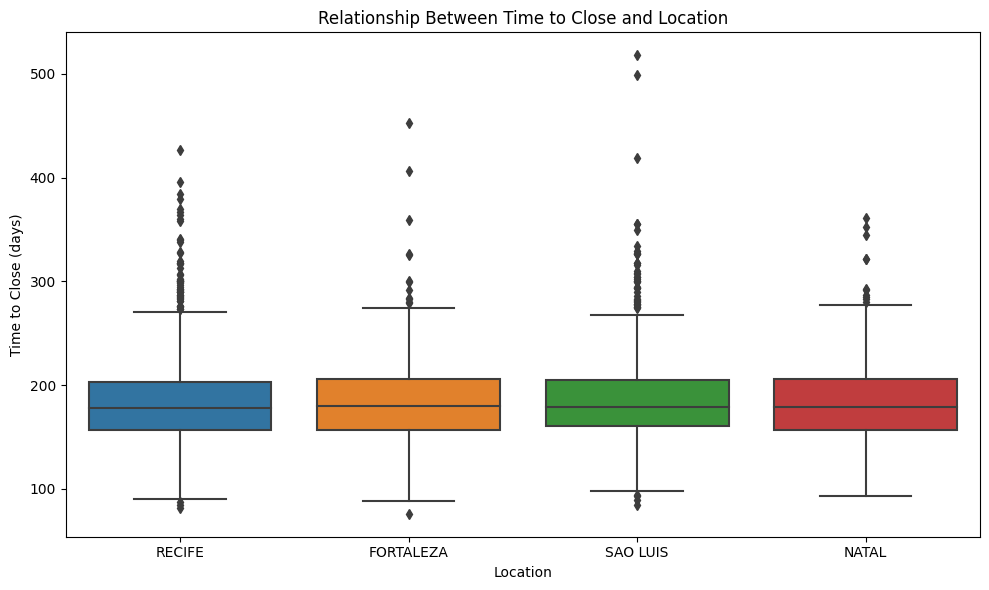

In [50]:
import seaborn as sns
# Create a box plot of time to close for each location
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='location', y='time_to_close')
plt.title('Relationship Between Time to Close and Location')
plt.xlabel('Location')
plt.ylabel('Time to Close (days)')
plt.tight_layout()

# Show the plot
plt.show()

In [55]:
avg_time_to_close = df.groupby('location')['time_to_close'].mean()

In [56]:
avg_time_to_close


location
FORTALEZA    185.305466
NATAL        185.926829
RECIFE       184.607910
SAO LUIS     187.170213
Name: time_to_close, dtype: float64

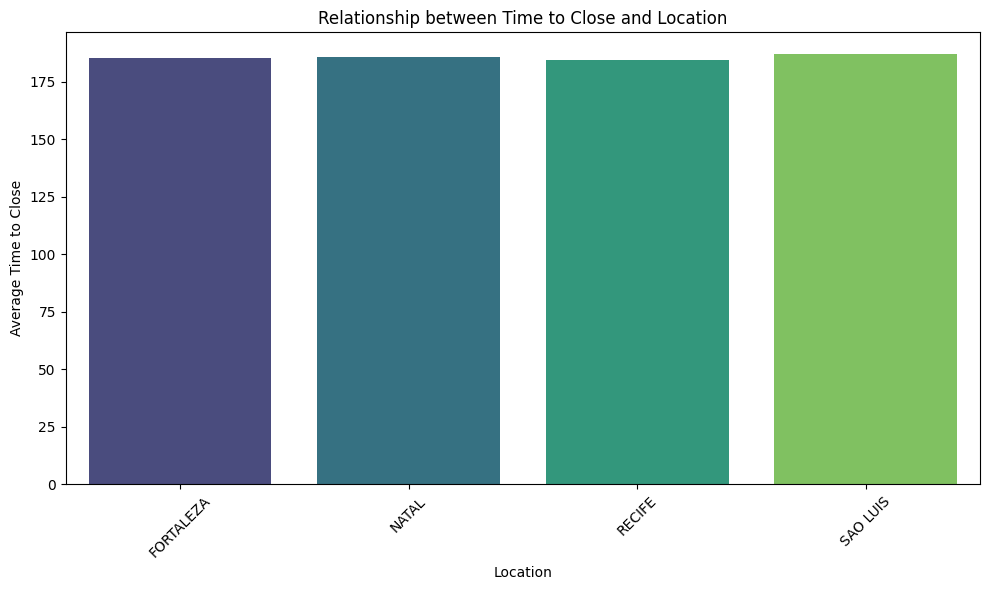

In [57]:
# Create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_time_to_close.index, y=avg_time_to_close.values, palette='viridis')
plt.xlabel('Location')
plt.ylabel('Average Time to Close')
plt.title('Relationship between Time to Close and Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The relationship between Time to close and location shows using the boxplot shows that the differences in average time to close between these locations are relatively small, indicating that the variation in closing times is not very significant across the different cities. 

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam